<center>
<img src="logo.png" height="900"> 
</center>


#  Распределения

В этом задании мы немного поработаем в python с разными случайными величинами. Делать это задание необязательно, но рекомендуется. 

In [2]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

## Упражнение 1 

> Нормальность восстановлена, мы на орбите Магратеи (Автостопом по галактике) 

__а)__ Задайте генератор для случайной величины имеющей нормальное распределение: $X \sim N(4, 10^2)$. 

In [9]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

norm_rv = sts.norm(loc=4, scale=10)

__б)__ Найдите вероятности $P(X > 4)$, $P(X \in [2; 20])$, $P(X < −5)$. Запишите их в переменные `p1, p2, p3`. 

0.5 0.5244604177395451 0.18406012534675947


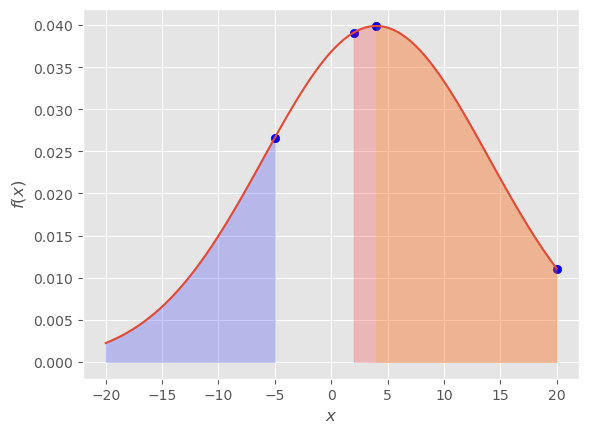

In [19]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

p1 = 1 - norm_rv.cdf(4)
p2 = norm_rv.cdf(20) - norm_rv.cdf(2)
p3 = norm_rv.cdf(-5)

print(p1, p2, p3)

# Решил посмотреть для себя за площадями:
x = np.linspace(-20, 20, 100)
cdf = norm_rv.cdf(x)

plt.plot(x, norm_rv.pdf(x))
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.scatter([-5], [norm_rv.pdf(-5)], color="blue");
xq = np.linspace(-20, -5, 100)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.scatter([2, 20], [norm_rv.pdf(2), norm_rv.pdf(20)], color="blue");
xq = np.linspace(2, 20, 100)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color='red', alpha=0.2)

plt.scatter([4], [norm_rv.pdf(4)], color="blue");
xq = np.linspace(4, 20, 100)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color='orange', alpha=0.2)

In [20]:
# Проверка корректно ли вы нашли вероятности :) 
# Задание необязательное, поэтому все тесты открытые

assert p1 == 0.5
assert np.abs(p2 - 0.5244604) < 1e-5
assert np.abs(p3 - 0.18406012) < 1e-5

__в)__ Найдите число $a$ такое, что $P(X > a) = 0.3$.

In [25]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# нужно взять в рассмотрение другую часть, то есть разность: PPF(1 - P(X > a))
a = norm_rv.ppf(1 - 0.3)
print(a)

9.244005127080406


In [26]:
assert np.abs(a - 9.2440051) < 1e-5

__г)__ Найдите число $b$ такое, что $P(X \in [4 - b; 4 + b]) = 0.5$.

In [41]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

print(norm_rv.cdf(4)) # уже ранее проверяли, что в этой точке: P(X < 4) = P(X > 4) = 0.5
b = 4 - norm_rv.ppf(0.5 / 2)
print(b)

0.5
6.744897501960817


In [42]:
assert np.abs(b - 6.7448975) < 1e-5

__д)__ Сгенерируйте выборку размера $100$. Постройте по этой выборке гистограмму. На том же рисунке изобразите плотность распределения нормальной случайной величины. 

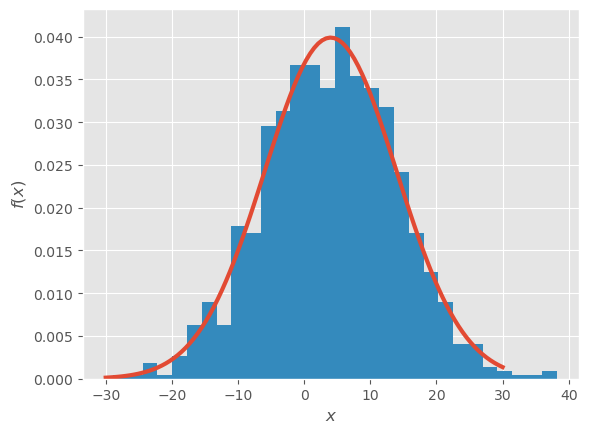

In [57]:
sample = norm_rv.rvs(1000)
sample[:100]

x = np.linspace(-30, 30, 100)
pdf = norm_rv.pdf(x)

# плотность 
plt.plot(x, pdf, lw=3)

# гистограмма, параметр density отнормировал её. 
plt.hist(sample, bins=30, density=True);

plt.ylabel('$f(x)$')
plt.xlabel('$x$');

__е)__ Оцените эмпирическую функцию распределения. Изобразите её и теоретическую функцию распределения на графике. 

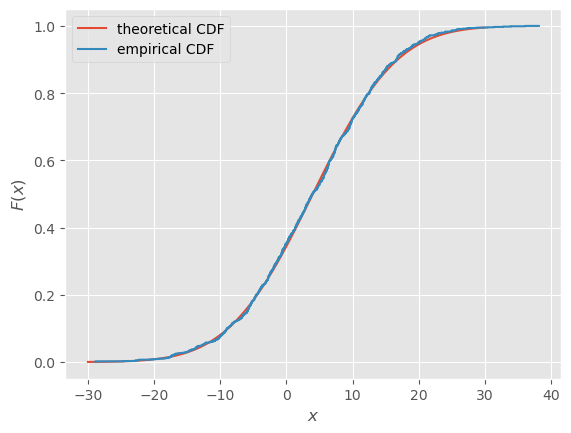

In [59]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

from statsmodels.distributions.empirical_distribution import ECDF

cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='empirical CDF')

plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left');

## Упражнение 2 

> Звёзды лучше видны с крыши, полезай и проверь сам. Ты так ждал этот знак свыше, и отметил его как спам. (Дайте танк) 

Пусть количество писем со спамом, которое пришло к нам на почту, имеет распределение Пуассона. Предположим, что вы получаете в среднем три спам-письма в день. Какова доля дней, в которые вы получаете пять или больше спам-писем?

In [63]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

p = 1 - sts.poisson.cdf(4, 3)
print(p)

0.1847367554762278


In [64]:
assert np.abs(p - 0.1847367) < 1e-5

## Упражнение 3 

Во время ЧЕ по футболу 2008 года и ЧМ 2010 года Осьминог Пауль занимался прогнозированием побед (после он ушёл в финансовую аналитику и IB). Осьминог дал верные прогнозы в 12 случаях из 14. Если предположить, что Пауль выбирает победителя наугад, какова вероятность получить 12 верных прогнозов из 14?

In [73]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

import math
p = math.comb(14, 12) * (0.5**12) * ((1 - 0.5)**(14 - 12))

print(p)

0.00555419921875


In [74]:
assert np.abs(p - 0.0055541) < 1e-5

Если предположить, что Осьминог правильно выбирает победителя с вероятностью $0.9$, какова вероятность получить тот же результат? 

In [75]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

p = math.comb(14, 12) * (0.9**12) * ((1 - 0.9)**(14 - 12))

print(p)



0.25701087819770996


In [76]:
assert np.abs(p - 0.2570108) < 1e-5